# Heart Disease Prediction

In this machine learning project, I have collected the dataset from UCI repository(https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not

importing the required libraries.
I am importing numpy and pandas for accesing and operating the data.For visualization, I will use pyplot subpackage of matplotlib and Seaborn.I am using sklearn library from pandas to shape the data compatible for machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [2]:
#accesing the data from the file folder
h=pd.read_csv('C:/Users/hp/Downloads/processed.cleveland.csv',names=['age','sex','cp','trestbps','chol',
                'fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
heart=pd.DataFrame(h)

In [3]:
#lets see the structure of the data
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
#checking for null values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Lets see the data counts of unique values in each column

In [4]:
for i in heart.columns:
    print(heart[i].value_counts())

58.0    19
57.0    17
54.0    16
59.0    14
52.0    13
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
41.0    10
64.0    10
67.0     9
63.0     9
42.0     8
43.0     8
53.0     8
65.0     8
55.0     8
61.0     8
45.0     8
46.0     7
66.0     7
50.0     7
48.0     7
47.0     5
49.0     5
39.0     4
68.0     4
35.0     4
70.0     4
69.0     3
40.0     3
71.0     3
34.0     2
37.0     2
38.0     2
74.0     1
29.0     1
77.0     1
76.0     1
Name: age, dtype: int64
1.0    206
0.0     97
Name: sex, dtype: int64
4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64
120.0    37
130.0    36
140.0    32
110.0    19
150.0    17
138.0    12
128.0    12
125.0    11
160.0    11
112.0     9
132.0     8
118.0     7
124.0     6
135.0     6
108.0     6
152.0     5
134.0     5
145.0     5
100.0     4
170.0     4
122.0     4
136.0     3
105.0     3
115.0     3
142.0     3
126.0     3
180.0     3
178.0     2
94.0      2
148.0     2
146.0     2
102.0     2
144.0     2
172.0     1
117.

Now,convert the categorical columns into the term of sorted labels using LabelEncoder from sklearn.preprocessing

In [5]:
lab=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for val in lab:
    heart[val]=le.fit_transform(heart[val].astype(str))

Visualisation of data

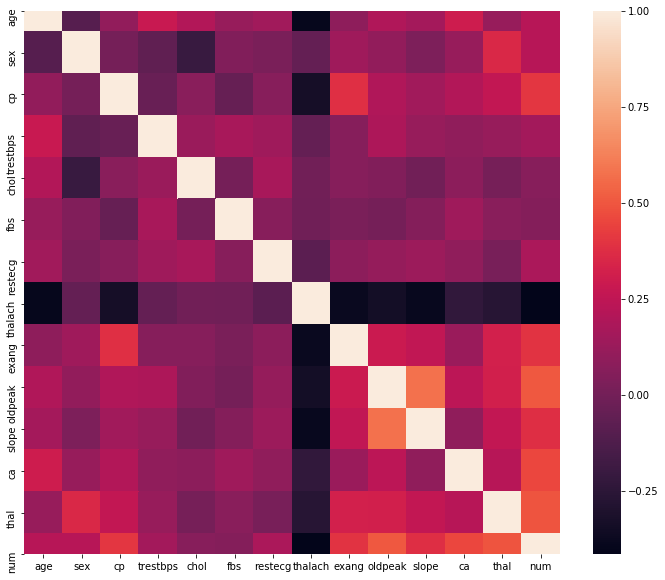

In [6]:
#Lets see Correlation among the data viewed through heatmap
plt.figure(figsize=(12,10))
heartcor=heart.corr()
sns.heatmap(heartcor)

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
fbs         AxesSubplot(0.327174,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.731522,0.518913;0.168478x0.16413)
exang          AxesSubplot(0.125,0.321957;0.168478x0.16413)
oldpeak     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.529348,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.731522,0.321957;0.168478x0.16413)
thal              AxesSubplot(0.125,0.125;0.168478x0.16413)
num            AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

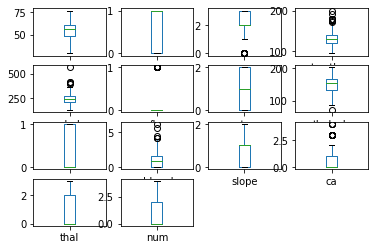

In [7]:
heart.plot(kind='box',subplots=True,layout=(4,4))

#the summary of boxplot displaying all features shows its a complete imbalanced datasets

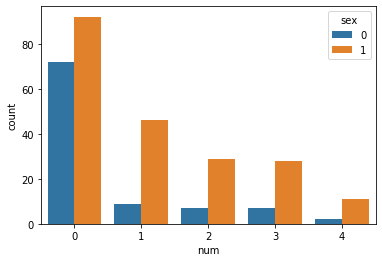

In [8]:
#lets see the counts of the disease type
sns.countplot(x='num',hue='sex',data=heart)

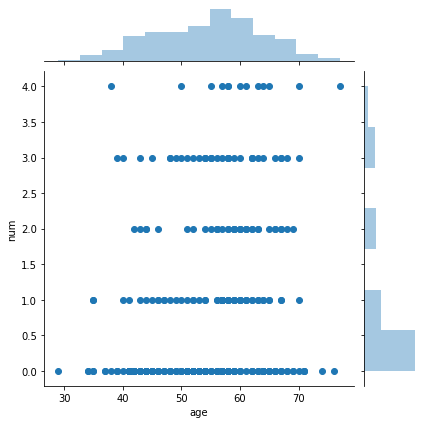

In [9]:
#plotting the jointplot b/w age and num column
sns.jointplot(x='age',y='num',data=heart)

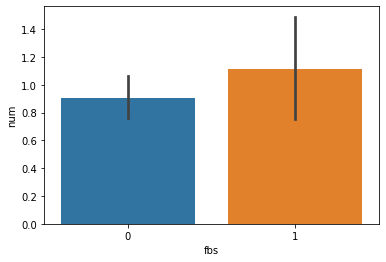

In [10]:
#plotting barplot for num wrt to fbs
sns.barplot(x='fbs',y='num',data=heart)

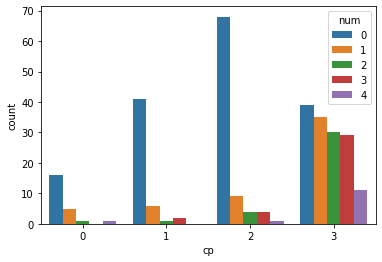

In [11]:
#getting the counts for the cp wrt num
sns.countplot(x='cp',hue='num',data=heart)

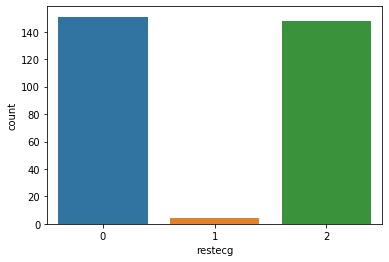

In [12]:
#countplot for restecg
sns.countplot(heart['restecg'])
#we see the restecg value of 1 is very less while others are almost equal

Applying zscore to remove outliers through the dataset

In [13]:
#applying zscore to the dataset
from scipy.stats import zscore
z=np.abs(zscore(heart))
heartnew=heart[(z<3).all(axis=1)]
heartnew.shape

(290, 14)

In [14]:
#lets check the original shape of our data
heart.shape

(303, 14)

In [15]:
#we see there is almost diffrence of 13 rows in data after applying zscore,so lets select the modified one
heart=heartnew

Statistical summary of data

In [16]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.00000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,54.341379,0.686207,2.148276,131.096552,244.472414,0.144828,0.97931,149.744828,0.327586,0.997931,0.586207,0.651724,0.827586,0.913793
std,9.053322,0.464836,0.967686,16.979460,45.912670,0.352535,0.99458,22.538941,0.470144,1.078283,0.606610,0.922281,0.965458,1.215307
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.00000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,2.000000,120.000000,211.000000,0.000000,0.00000,133.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,240.500000,0.000000,0.00000,153.000000,0.000000,0.750000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,274.000000,0.000000,2.00000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,2.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.00000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,4.000000


as zscore is already applied,so we get the fair observations of mean and standard deviation.Some of the column shows outliers,so we need to scale them or handle using boxcox futhur

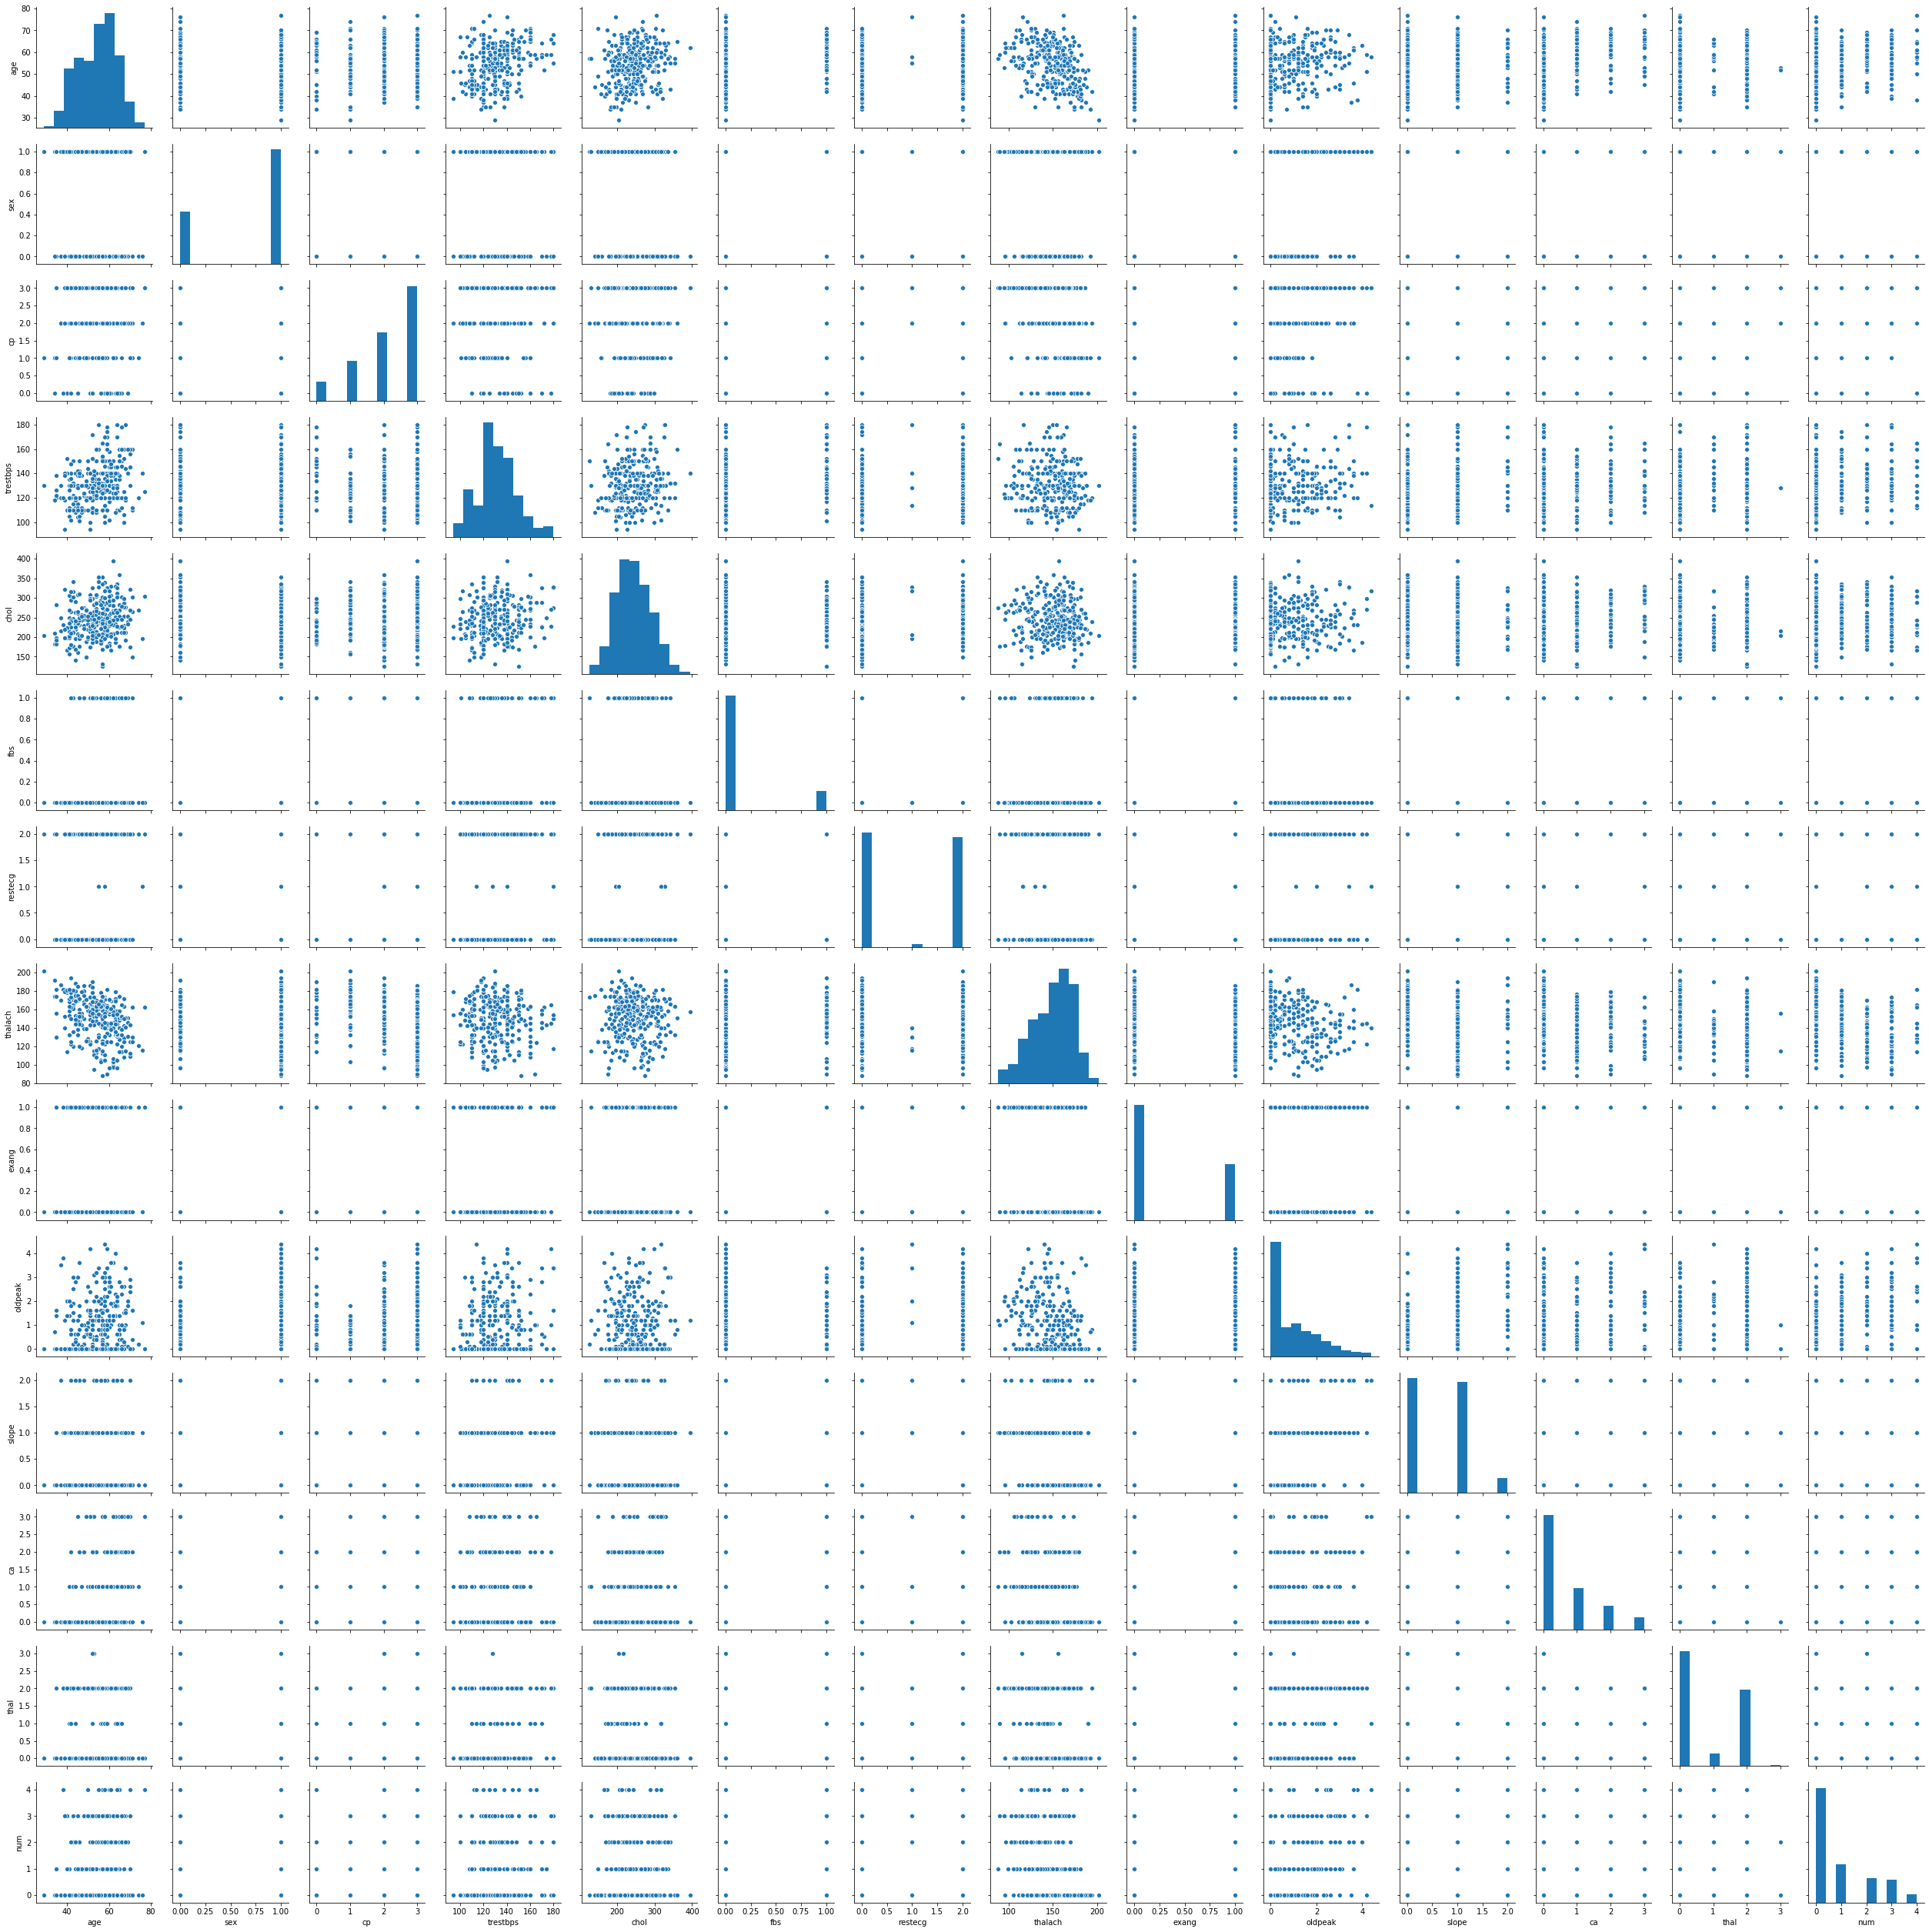

In [17]:
sns.pairplot(heart)

Shaping the data ready for the machine learning

In [18]:
#seperating the input and target variables
def_x=heart.iloc[:,:-1]
y=heart.iloc[:,-1]

In [19]:
#checking for any skewed values in the data
def_x.skew()

age        -0.186325
sex        -0.806737
cp         -0.831791
trestbps    0.527410
chol        0.249827
fbs         2.028954
restecg     0.041601
thalach    -0.473920
exang       0.738544
oldpeak     0.994311
slope       0.508254
ca          1.226241
thal        0.398096
dtype: float64

In [20]:
#adjusting for skewed values
for index in def_x.skew().index:
    if def_x.skew().loc[index]>0.5:
        def_x[index]=np.log1p(def_x[index])
    if def_x.skew().loc[index]<-0.5:
        def_x[index]=np.square(def_x[index])

In [21]:
#now we need to scale the input values,so using standard scalar for that
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
mod_x=scale.fit_transform(def_x)

#putting the values to the dataframe
x=pd.DataFrame(mod_x,columns=def_x.columns)

In [22]:
#we need to suppress the warnings arises in detrmining random state
import warnings
warnings.filterwarnings('ignore')

In [23]:
#function for determining random state
def random(alg):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [24]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [25]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

Now,Lets start to apply for algorithm one by one

Logistic Regression

In [26]:
# lets start using linear_model first
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
random(lr)

0.6666666666666666 at 81


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=81)
model(lr)

score= 0.634020618556701
0.6666666666666666
[[49  1  0  0  0]
 [12  7  1  0  0]
 [ 2  4  5  2  0]
 [ 0  3  4  2  0]
 [ 1  0  1  1  1]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86        50
           1       0.47      0.35      0.40        20
           2       0.45      0.38      0.42        13
           3       0.40      0.22      0.29         9
           4       1.00      0.25      0.40         4

    accuracy                           0.67        96
   macro avg       0.62      0.44      0.47        96
weighted avg       0.64      0.67      0.63        96



In [28]:
cross_val(lr)

[0.61666667 0.63333333 0.5        0.59649123 0.61818182]
mean_score= 0.5929346092503988
standard deviation 0.047921143870985276


Decision Tree

In [29]:
#checking the data using decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.59375 at 54


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=96)
model(dtc)

score= 1.0
0.5520833333333334
[[43  4  3  3  1]
 [ 8  5  1  2  1]
 [ 2  1  5  3  1]
 [ 2  5  3  0  2]
 [ 0  0  1  0  0]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79        54
           1       0.33      0.29      0.31        17
           2       0.38      0.42      0.40        12
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         1

    accuracy                           0.55        96
   macro avg       0.30      0.30      0.30        96
weighted avg       0.55      0.55      0.55        96



In [31]:
cross_val(dtc)

[0.48333333 0.48333333 0.43103448 0.49122807 0.52727273]
mean_score= 0.4832403893746906
standard deviation 0.030751012302381923


K-neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knn,parameters)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 19}

In [33]:
knn=KNeighborsClassifier(n_neighbors=19)
random(knn)

0.6458333333333334 at 95


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=95)
model(knn)

score= 0.5979381443298969
0.6458333333333334
[[57  1  0  1  0]
 [11  4  3  1  0]
 [ 2  3  1  0  1]
 [ 3  5  2  0  0]
 [ 0  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        59
           1       0.29      0.21      0.24        19
           2       0.17      0.14      0.15         7
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1

    accuracy                           0.65        96
   macro avg       0.25      0.26      0.25        96
weighted avg       0.55      0.65      0.59        96



Lets check for the support vector machine algorithm

In [35]:
from sklearn.svm import SVC
svm=SVC()
random(svm)

0.6770833333333334 at 67


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=67)
model(svm)

score= 0.7731958762886598
0.6770833333333334
[[55  0  0  0  0]
 [ 9  4  3  1  0]
 [ 6  1  3  1  0]
 [ 2  3  2  3  0]
 [ 1  1  1  0  0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        55
           1       0.44      0.24      0.31        17
           2       0.33      0.27      0.30        11
           3       0.60      0.30      0.40        10
           4       0.00      0.00      0.00         3

    accuracy                           0.68        96
   macro avg       0.43      0.36      0.37        96
weighted avg       0.61      0.68      0.62        96



checking the algorithm for ensemble techniques

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500,1000]}
grid=GridSearchCV(rf,parameters)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 100}

In [38]:
rf=RandomForestClassifier(n_estimators=10)
random(rf)

0.6458333333333334 at 95


In [39]:
model(rf)

score= 0.9845360824742269
0.5416666666666666
[[48  6  0  1  0]
 [10  2  3  2  0]
 [ 5  3  2  1  0]
 [ 4  5  0  0  1]
 [ 1  2  0  0  0]]
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        55
           1       0.11      0.12      0.11        17
           2       0.40      0.18      0.25        11
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         3

    accuracy                           0.54        96
   macro avg       0.24      0.23      0.23        96
weighted avg       0.47      0.54      0.50        96



From all the above solved algorithms,we get the best accuracy score from support vector machine at random state of 67

In [40]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
random(svm)

0.6770833333333334 at 67


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=67)
model(svm)

score= 0.7731958762886598
0.6770833333333334
[[55  0  0  0  0]
 [ 9  4  3  1  0]
 [ 6  1  3  1  0]
 [ 2  3  2  3  0]
 [ 1  1  1  0  0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        55
           1       0.44      0.24      0.31        17
           2       0.33      0.27      0.30        11
           3       0.60      0.30      0.40        10
           4       0.00      0.00      0.00         3

    accuracy                           0.68        96
   macro avg       0.43      0.36      0.37        96
weighted avg       0.61      0.68      0.62        96



In [42]:
cross_val(svm)

[0.58333333 0.61666667 0.60344828 0.57894737 0.6       ]
mean_score= 0.5964791288566244
standard deviation 0.01377444583519857


In [43]:
#saving the model
from sklearn.externals import joblib
joblib.dump(svm,'heartdisease.pkl')

['heartdisease.pkl']

### Conclusion

In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated labels for categorical features and scaled other features. 
I then applied four Machine Learning algorithms,'Logistic Regression','Support Vector Classifier','Decision Tree Classifier' and 'Random Forest Classifier'. I varied parameters across each model to improve their scores.
In the end, Support Vector Classifier achieved the highest score of 0.67 with random state of 67 anf 'rbf' kernel.